In [1]:
# Using Africa's Economic, Banking and Systemic Crisis Data to learn more about trends in Kenya

In [2]:
# Import the needed libraries
import numpy as np
import pandas as pd

In [3]:
# Import the dataset into a dataframe
data = pd.read_csv('african_crises.csv')

# Preview a sample of the data
data.sample(10)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
1058,70,ZWE,Zimbabwe,2013,0,361.900000,1,1,0.00,1.632000,1,0,0,no_crisis
867,63,TUN,Tunisia,1985,0,0.756950,0,0,0.00,7.551000,1,0,0,no_crisis
927,69,ZMB,Zambia,1973,0,0.000643,0,0,0.00,6.493506,1,0,0,no_crisis
434,19,EGY,Egypt,2011,0,6.016900,0,0,0.00,11.090000,1,0,0,no_crisis
72,1,DZA,Algeria,2002,0,79.723400,0,0,0.00,1.430000,1,0,0,no_crisis
62,1,DZA,Algeria,1992,1,22.781400,0,1,0.23,31.700000,1,0,1,crisis
40,1,DZA,Algeria,1970,0,4.937060,0,0,0.00,3.656321,1,0,0,no_crisis
474,35,KEN,Kenya,1984,0,15.781300,0,0,0.00,20.667000,1,0,1,no_crisis
736,56,ZAF,South Africa,1928,0,0.206500,0,0,0.00,-0.758592,1,0,0,no_crisis
913,69,ZMB,Zambia,1959,0,0.000714,0,0,0.00,2.083333,0,0,0,no_crisis


In [4]:
# View the description of the data
data.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [5]:
# View the unique countries in the data
unique_countries = data.country.unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [6]:
# Create new dataframe with only Kenyan data
kenya_data = data.loc[ data.country == "Kenya" ]
kenya_data.sample(10)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
489,35,KEN,Kenya,1999,1,72.9306,0,0,0.0,5.753000,1,1,0,no_crisis
462,35,KEN,Kenya,1972,0,7.1429,0,0,0.0,4.525219,1,0,0,no_crisis
449,35,KEN,Kenya,1959,0,7.1429,0,0,0.0,0.856646,0,0,0,no_crisis
490,35,KEN,Kenya,2000,0,78.0361,0,1,0.0,9.955000,1,0,0,no_crisis
452,35,KEN,Kenya,1962,0,7.1429,0,0,0.0,2.740605,0,0,0,no_crisis
491,35,KEN,Kenya,2001,0,78.6000,0,0,0.0,5.824000,1,0,0,no_crisis
467,35,KEN,Kenya,1977,0,7.9471,0,0,0.0,18.010882,1,0,0,no_crisis
445,35,KEN,Kenya,1955,0,7.1429,0,0,0.0,6.369450,0,0,0,no_crisis
486,35,KEN,Kenya,1996,1,55.0211,0,1,0.0,8.862000,1,0,0,no_crisis
466,35,KEN,Kenya,1976,0,8.2700,0,0,0.0,9.527607,1,1,0,no_crisis


In [7]:
# View the Kenyan data description
kenya_data.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,67.0,67.000000,67.000000,67.000000,67.0,67.000000,67.0,67.000000,67.000000,67.000000,67.000000
mean,35.0,1981.000000,0.194030,30.713180,0.0,0.089552,0.0,8.725192,0.776119,0.134328,0.059701
std,0.0,19.485037,0.398437,30.573997,0.0,0.287694,0.0,7.808591,0.419989,0.343578,0.238721
min,35.0,1948.000000,0.000000,4.958200,0.0,0.000000,0.0,-0.285716,0.000000,0.000000,0.000000
25%,35.0,1964.500000,0.000000,7.142900,0.0,0.000000,0.0,3.642417,1.000000,0.000000,0.000000
50%,35.0,1981.000000,0.000000,10.286200,0.0,0.000000,0.0,6.878000,1.000000,0.000000,0.000000
75%,35.0,1997.500000,0.000000,62.676400,0.0,0.000000,0.0,11.500500,1.000000,0.000000,0.000000
max,35.0,2014.000000,1.000000,89.350000,0.0,1.000000,0.0,45.979000,1.000000,1.000000,1.000000


In [8]:
## Statistics follow below using the following libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set styles
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))

# Set random color
rand_col = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])

<Figure size 1440x1440 with 0 Axes>

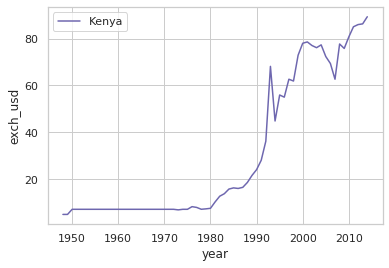

In [18]:
# Average USD exchange rate in Kenya over the years
sns.lineplot(kenya_data['year'], kenya_data['exch_usd'], label = 'Kenya', color = rand_col)
plt.savefig("usd_exchange_rate.png")

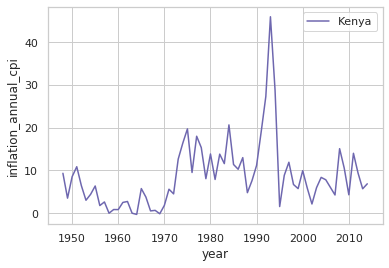

In [19]:
# Average inflation rate in Kenya over the years
sns.lineplot(kenya_data['year'], kenya_data['inflation_annual_cpi'], label = 'Kenya', color = rand_col)
plt.savefig("inflation_rate.png")

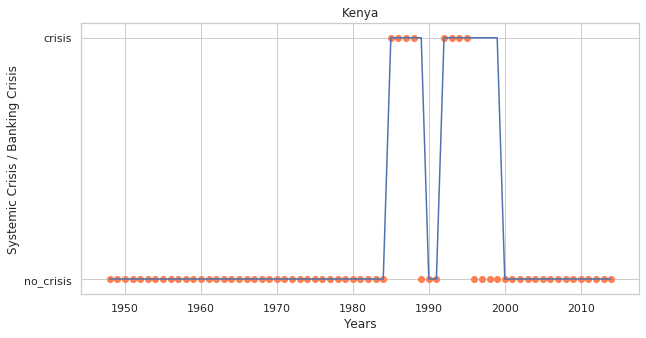

In [21]:
# Check if there is a corellation between systemic crisis and banking crisis
plt.figure(figsize=(10,5))
sns.lineplot(kenya_data['year'], kenya_data['systemic_crisis'], ci = None)
plt.scatter(kenya_data['year'], kenya_data['banking_crisis'], color = 'coral', label = 'Banking Crisis')
plt.xlabel('Years')
plt.ylabel('Systemic Crisis / Banking Crisis')
plt.title('Kenya')
plt.savefig("systemic_crisis_vs_banking_crisis.png")

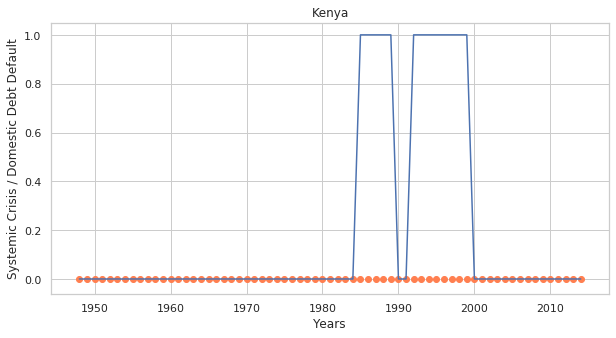

In [22]:
# Check if there is a corellation between systemic crisis and soverign domestic debt default
plt.figure(figsize=(10,5))
sns.lineplot(kenya_data['year'], kenya_data['systemic_crisis'], ci = None)
plt.scatter(kenya_data['year'], kenya_data['domestic_debt_in_default'], color = 'coral', label = 'Domestic Debt Default')
plt.xlabel('Years')
plt.ylabel('Systemic Crisis / Domestic Debt Default')
plt.title('Kenya')
plt.savefig("systemic_crisis_vs_domestic_debt_default.png")

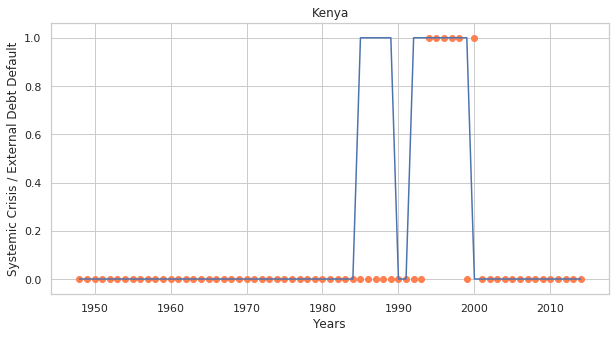

In [23]:
# Check if there is a corellation between systemic crisis and soverign external debt default
plt.figure(figsize=(10,5))
sns.lineplot(kenya_data['year'], kenya_data['systemic_crisis'], ci = None)
plt.scatter(kenya_data['year'], kenya_data['sovereign_external_debt_default'], color = 'coral', label = 'External Debt Default')
plt.xlabel('Years')
plt.ylabel('Systemic Crisis / External Debt Default')
plt.title('Kenya')
plt.savefig("systemic_crisis_vs_external_debt_default.png")

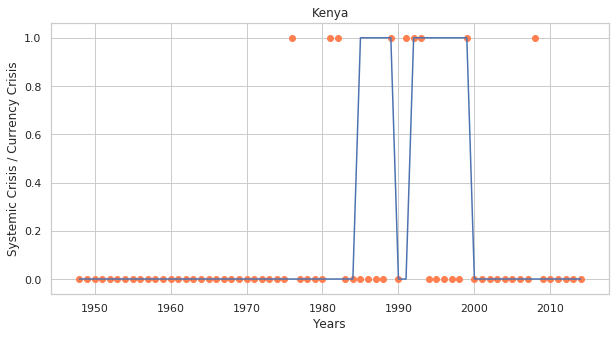

In [24]:
# Check if there is a corellation between systemic crisis and currency crisis
plt.figure(figsize=(10,5))
sns.lineplot(kenya_data['year'], kenya_data['systemic_crisis'], ci = None)
plt.scatter(kenya_data['year'], kenya_data['currency_crises'], color = 'coral', label = 'Currency Crisis')
plt.xlabel('Years')
plt.ylabel('Systemic Crisis / Currency Crisis')
plt.title('Kenya')
plt.savefig("systemic_crisis_vs_currency_crisis.png")

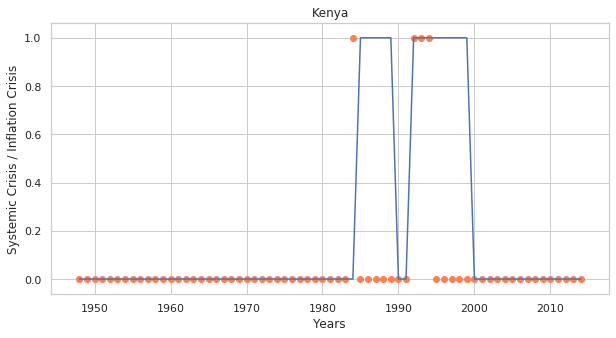

In [25]:
# Check if there is a corellation between systemic crisis and inflation crisis
plt.figure(figsize=(10,5))
sns.lineplot(kenya_data['year'], kenya_data['systemic_crisis'], ci = None)
plt.scatter(kenya_data['year'], kenya_data['inflation_crises'], color = 'coral', label = 'Inflation Crisis')
plt.xlabel('Years')
plt.ylabel('Systemic Crisis / Inflation Crisis')
plt.title('Kenya')
plt.savefig("systemic_crisis_vs_inflation_crisis.png")